In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys,glob

In [45]:
path = r'/Users/danieljdenman/Desktop/2021-08-16_16-23-23/RecordNode101/experiment1/recording1/events/NI-DAQmx-100.0/TTL_1'

In [46]:
base = '/'
for folder in path.split('/')[1:]:
    base = base+folder+'/'
    if folder[:2] == '20': break
stim_path = os.path.join(base,'stim')

In [55]:
import _pickle as pkl

In [56]:
gratings_pkl = pkl.load(open(glob.glob(stim_path+'/*')[0],'rb'))
scene_pkl = pkl.load(open(glob.glob(stim_path+'/*')[2],'rb'))
arbMatrixcolor_pkl = pkl.load(open(glob.glob(stim_path+'/*')[3],'rb'))
arbMatrix_pkl = pkl.load(open(glob.glob(stim_path+'/*')[1],'rb'))

In [47]:
from open_ephys.analysis import Session
session = Session(base)
df_events = session.recordnodes[0].recordings[0].events
df_events['times']=df_events.timestamp/48000.

/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


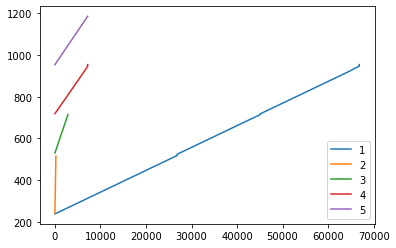

In [63]:
for ch in ([1,2,3,4,5]):
    plt.plot(df_events[df_events.channel==ch][df_events.state==1].times.values,label=ch)
plt.legend()

In [83]:
df_gratings = df_events[df_events.channel==2][df_events.state==1]
df_scenes = df_events[df_events.channel==3][df_events.state==1]
df_noise = df_events[df_events.channel==4][df_events.state==1]
df_noise_color= df_events[df_events.channel==5][df_events.state==1]
print('df_gratings: '+str(df_gratings.shape[0]))
print('df_scenes: '+str(df_scenes.shape[0]))
print('df_noise: '+str(df_noise.shape[0]))
print('df_noise_color: '+str(df_noise_color.shape[0]))

df_gratings: 220
df_scenes: 2864
df_noise: 7201
df_noise_color: 7200


/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/danieljdenman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


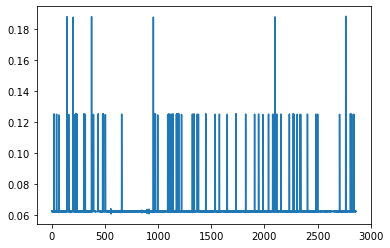

In [81]:
plt.plot(np.diff(df_scenes.times))

In [79]:
len(scene_pkl['bgsweeporder'])

2950

In [127]:
channels_ = np.unpackbits(channel_states.view(np.uint16)).reshape(timestamps.shape[0],16)

TypeError: Expected an input array of unsigned byte data type

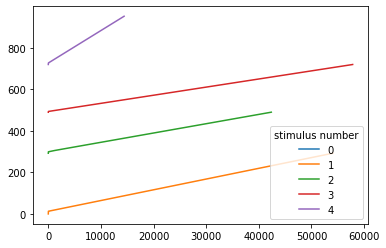

In [9]:
breaks = np.where((np.diff(timestamps))>2)[0]
stim_times = {}
stim_times['0']= timestamps[:breaks[0]]
for i,stim in enumerate(np.arange(len(breaks)-1)):
    stim_times[str(i+1)] = timestamps[np.where((np.diff(timestamps))>2)[0][i]:np.where((np.diff(timestamps))>2)[0][i+1]]
stim_times[str(len(breaks))]= timestamps[breaks[-1]:]

for i in stim_times.keys():
    plt.plot(stim_times[i],label=str(i))
plt.legend(title='stimulus number')

In [29]:
base = '/'
for folder in path.split('/')[1:]:
    base = base+folder+'/'
    if folder[:2] == '20': break
stim_path = os.path.join(base,'stim')

stimulus order
1. gratings orientation
2. scene flicker
3. arbMatrix highspeed
4. arbMatrix color


In [59]:
glob.glob(stim_path+'/*')

['/Users/danieljdenman/Desktop/2021-08-16_12-19-00/stim/210816124102-arbMatrix_highspeed-test.pkl',
 '/Users/danieljdenman/Desktop/2021-08-16_12-19-00/stim/2021-08-16-123458891692.pkl',
 '/Users/danieljdenman/Desktop/2021-08-16_12-19-00/stim/210816123454-scene_flicker_shuffled-test.pkl',
 '/Users/danieljdenman/Desktop/2021-08-16_12-19-00/stim/2021-08-16-124712885587color_.pkl']

In [72]:
arbMatrix_pkl.shape

(7200, 64, 64)

In [100]:
stim_times['2'].shape

(42376,)

In [104]:
np.shape(scene_pkl['droppedframes'])

(2, 0)

In [115]:
np.shape(scene_pkl['bgsweeporder'])[0]

2950

In [82]:
gratings_pkl.keys()

dict_keys(['window', 'params', 'showmouse', 'fps', 'degreemode', 'domain', 'miniwindow', 'script', 'wwidth', 'wheight', 'monitor', 'vsynccount', 'stimuli', 'runs', 'shuffle', 'preexpsec', 'postexpsec', 'postsweepsec', 'sweeplength', 'blanksweeps', 'logdir', 'backupdir', 'mouseid', 'userid', 'nidevice', 'bgcolor', 'syncsqr', 'syncsqrloc', 'syncsqrfreq', 'syncsqrcolorsequence', 'syncpulse', 'syncpulseport', 'syncpulselines', 'trigger', 'triggerdiport', 'triggerdiline', 'savesweeptable', 'eyetracker', 'syncsqrBit', 'sweepsdisplayed', 'errors', 'bgSweep', 'fgSweep', 'bgFrame', 'fgFrame', 'bgsweeptable', 'bgsweeporder', 'bgdimnames', 'fgsweeptable', 'fgsweeporder', 'fgdimnames', 'bgStim', 'fgStim', 'do', 'sweepBit', 'frameBit', 'startdatetime', 'starttime', 'stoptime', 'stopdatetime', 'intervalsms', 'droppedframes', 'scripttext', 'platform', 'vsyncintervals', 'bgsweepframes', 'keys', 'unpickleable'])